In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import glob
import random

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') 



In [3]:
!nvidia-smi

Sat Jun  3 16:30:10 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
| 35%   51C    P8              13W / 200W |   3798MiB /  8192MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
path = r'H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\\' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

p = 0.40  # 40% of the data

for filename in all_files:
    df = pd.read_csv(filename, encoding='cp1252', index_col=None, low_memory=False)
    #df = pd.read_csv(filename, encoding='cp1252', index_col=None, skiprows=lambda i: i>0 and random.random() > p, 
                     #low_memory=False)
    li.append(df)
    print("Read Completed for ", filename)

df = pd.concat(li, axis=0, ignore_index=True)
print("Finished Reading All Files.")

Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Friday-WorkingHours-Morning.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Monday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Tuesday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:\\Datasets\\CIC-IDS2017\\TrafficLabelling\Wednesday-workingHours.pcap_ISCX.csv
Finished Reading All Files.


In [5]:
from unidecode import unidecode
#df[" Label"] = df[" Label"].apply(unidecode)
#df[" Label"].apply(unidecode)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

In [7]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443.0,192.168.10.5,54865.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80.0,192.168.10.5,55054.0,6.0,7/7/2017 3:30,109.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80.0,192.168.10.5,55055.0,6.0,7/7/2017 3:30,52.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443.0,192.168.10.16,46236.0,6.0,7/7/2017 3:30,34.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443.0,192.168.10.5,54863.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
df[" Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

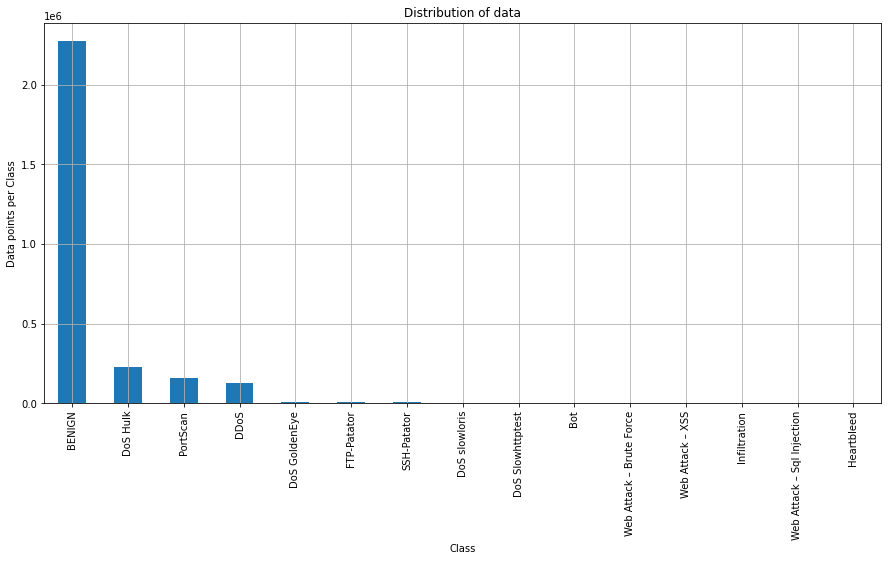

In [9]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df[' Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of data')
plt.grid()
plt.show()

In [10]:
df[" Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

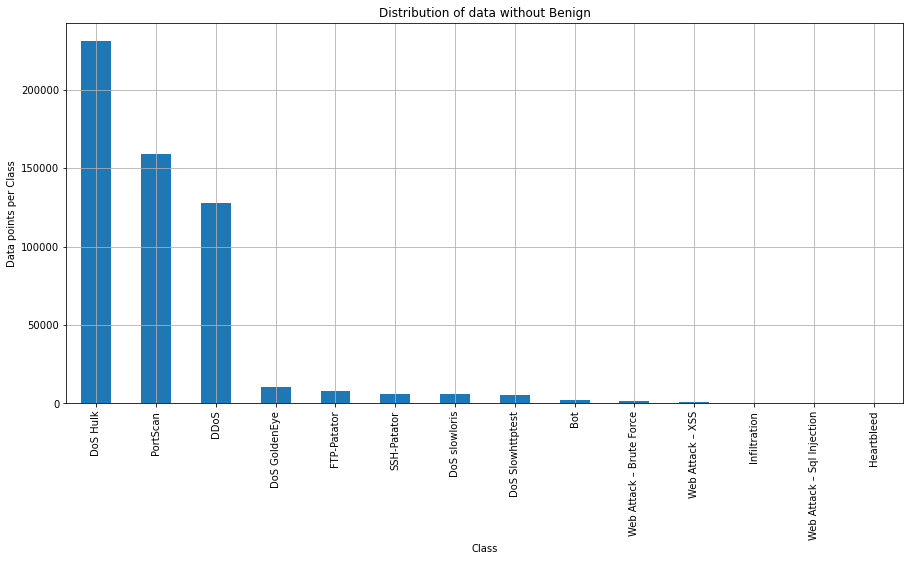

In [11]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df[df[" Label"] != "BENIGN"][" Label"].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of data without Benign')
plt.grid()
plt.show()

In [12]:
#np.unique(df[" Label"])
df[" Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack – Brute Force', 'Web Attack – XSS',
       'Web Attack – Sql Injection', nan, 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [13]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [14]:
#drop na values and reset index
data_clean = df.dropna().reset_index()

data_clean[' Label'].value_counts()


BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [15]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [16]:
df=df.drop('Flow ID',axis=1)
df=df.drop(' Source IP',axis=1)
df=df.drop(' Destination IP',axis=1)
df=df.drop(' Timestamp',axis=1)
#df=df.drop(' Source Port',axis=1)
#df=df.drop(' Destination Port',axis=1)

In [17]:
df.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean[' Label'] = labelencoder.fit_transform(data_clean[' Label'])

data_clean[' Label'].value_counts()

0     2272688
4      230124
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name:  Label, dtype: int64

In [19]:
data_clean.describe()

,index,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,...,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06,2.829385e+06
mean,1.531043e+06,4.112920e+04,8.071249e+03,9.882203e+00,1.479276e+07,9.364763e+00,1.039869e+01,5.495661e+02,1.617040e+04,2.076996e+02,...,-2.743019e+03,8.159046e+04,4.115386e+04,1.532560e+05,5.832380e+04,8.320028e+06,5.040858e+05,8.699926e+06,7.923832e+06,1.063587e+00
std,9.402861e+05,2.229661e+04,1.828343e+04,5.262498e+00,3.366026e+07,7.498527e+02,9.976276e+02,9.995980e+03,2.263631e+06,7.173425e+02,...,1.085250e+06,6.487531e+05,3.934749e+05,1.026066e+06,5.772293e+05,2.363505e+07,4.604076e+06,2.437199e+07,2.336838e+07,2.576445e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.073940e+05,3.277000e+04,5.300000e+01,6.000000e+00,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,2.000000e+00,6.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.414816e+06,5.094600e+04,8.000000e+01,6.000000e+00,3.132700e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.410982e+06,5.841600e+04,4.430000e+02,1.700000e+01,3.221416e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.119344e+06,6.553500e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.400000e+01


In [20]:
data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:80]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,81:]).toarray()

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

In [22]:
X.shape

(2827876, 80)

In [23]:
Y.shape

(2827876, 15)

# DNN

In [24]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from tensorflow import keras
import tensorflow as tf

In [25]:
from tensorflow.keras.callbacks import EarlyStopping


# Simple 3 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation = 'softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10368     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               3

In [26]:
#model.save('H:/Datasets/CIC-IDS2017/model_dnn.h5')

In [27]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)


# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))



pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 18s 831us/step
Inference time: 29.05 seconds


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:01:03.583760
Validation score: 0.9980168861718124
Evaluation score: [0.0007531748851761222, 0.998016893863678]
Recall score: 0.9980168861718124
Precision score: 0.9980212462731757
F1 Measure score: 0.9980112750341071
ROC-AUC score: 0.9537802936169648


In [28]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [29]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 19s 838us/step


In [30]:
pred.shape
y_test.shape

(706969,)

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567577,      2,     13,     18,     75,      8,      2,      3,
             0,      5,     13,      5,     31,      0,     16],
       [    10,    469,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    10,      0,  32109,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     5,      0,      0,   2569,     13,      1,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [  1073,      0,      0,      1,  56373,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     5,      0,      0,      1,      0,   1347,      8,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     6,      0,      0,      1,      0,      0,   1433,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    10,      0,      0,      0,  

In [34]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('DNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

In [ ]:
#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('DNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('DNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [ ]:
cm_df = pd.DataFrame(confMat)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show()  

# CNN Model

In [24]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, MaxPooling1D, Dropout
from sklearn import metrics


X_train = X_train.reshape(X_train.shape[0], 80, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 80, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, padding="same", activation="relu", input_shape=(_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=6, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation = 'softmax'))

model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test))  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 80, 128)           896       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 40, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 256)           196864    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 256)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [25]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))  

#model.save('H:/Datasets/CIC-IDS2017/model_cnn.h5')

22093/22093 [==============================] - 22s 999us/step
Best loss: 0.0012017065891996026
Balanced Acc loss: 94.51614007074708


In [26]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 23s 1ms/step
Inference time: 29.36 seconds
Completed
Time taken: 0:01:10.569646
Validation score: 0.9995784822248217
Evaluation score: [0.0014752219431102276, 0.9995784759521484]
Recall score: 0.9995784822248217
Precision score: 0.9995879832599394
F1 Measure score: 0.99958129446439
ROC-AUC score: 0.9725555724105255


In [27]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [28]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 24s 1ms/step


In [29]:
pred.shape
y_test.shape

(706969,)

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567559,      1,     42,      6,     79,     18,      3,      2,
             0,      5,      3,      9,     22,      0,     19],
       [     2,    477,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,  32119,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,      0,   2574,     13,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      0,  57444,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      0,      1,   1354,      3,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     2,      0,      0,      0,      1,      0,   1437,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     7,      0,      0,      0,  

In [ ]:
cf_matrix = confMat
plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cmap='Blues')

In [ ]:
cf_matrix = confMat
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 

In [33]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('CNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

In [ ]:
#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('CNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('CNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [37]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 19s 877us/step


In [38]:
pred.shape
y_test.shape

(706969,)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show()  